# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [8]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


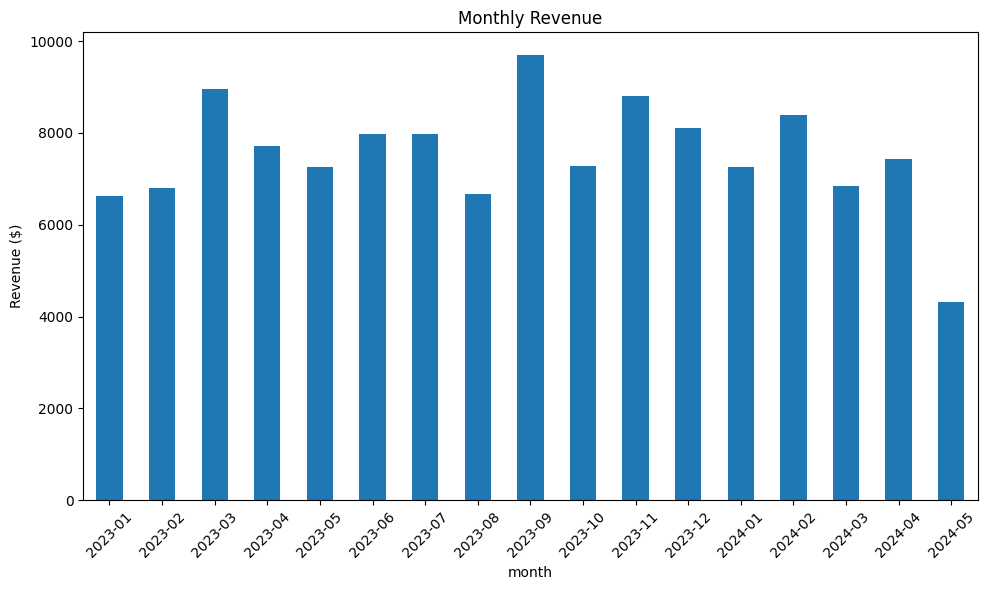

In [9]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

     order_id  customer_id customer_segment region order_date  \
456       457           53           Senior  North 2024-04-01   
457       458           60     Professional  South 2024-04-02   
458       459            5     Professional  North 2024-04-03   
459       460           68     Professional   West 2024-04-04   
460       461            6           Senior  North 2024-04-05   
461       462           96          Student   West 2024-04-06   
462       463           94     Professional   West 2024-04-07   
463       464           47     Professional   West 2024-04-08   
464       465           99     Professional   East 2024-04-09   
465       466           55          Student  North 2024-04-10   
466       467           40           Senior  South 2024-04-11   
467       468           52           Senior  South 2024-04-12   
468       469           16     Professional  North 2024-04-13   
469       470           13     Professional   East 2024-04-14   
470       471           3

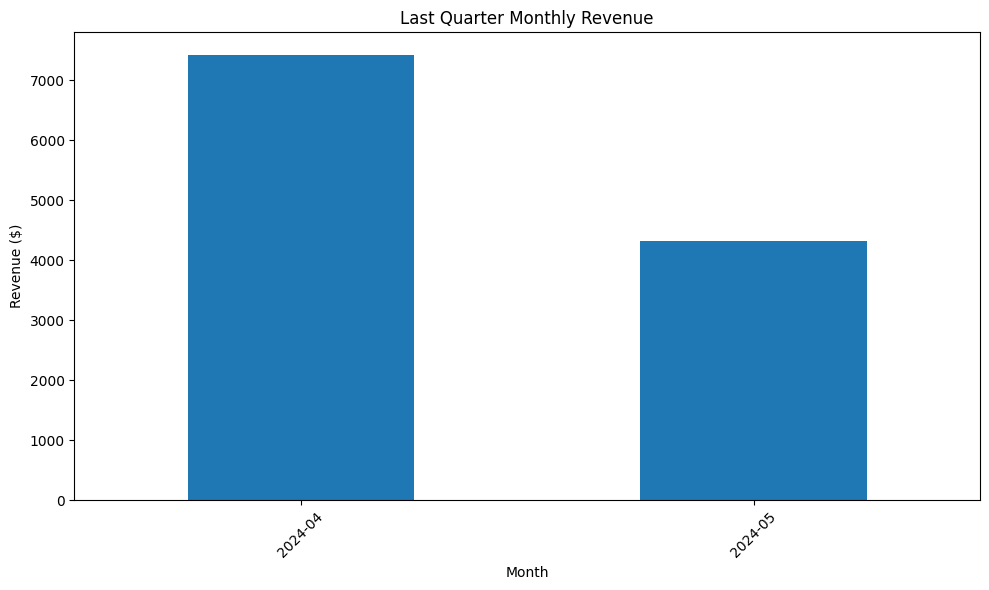

In [10]:
# Your code here
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["quarter"] = data["order_date"].dt.to_period("Q")
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()


last_quarter = data["quarter"].max()
data_last_quarter = data[data["quarter"] == last_quarter]
print(data_last_quarter)

last_quarter_revenue = data_last_quarter.groupby("month")["revenue"].sum()

print("Last Quarter Monthly Revenue:")
#print(last_quarter_revenue)

last_quarter_revenue.plot(kind ="bar",figsize=(10,6), title="Last Quarter Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
                          

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [ ]:
# Your code here
top_5 =sorted(df["revenue"], reverse=True)[:5]

top_5_coustomer = df[df["revenue"].isin(top_5)]

print(top_5_coustomer["customer_id"])
print(top_5_coustomer)

NameError: name 'top5' is not defined

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [ ]:
# Your code here
avg_revenue_by_segment = data.groupby("customer_segment")["revenue"].mean()
print(avg_revenue_by_segment)

avg_revenue_by_segment_sorted =avg_revenue_by_segment.sort_values(ascending=False)

print(avg_revenue_by_segment_sorted)
print(avg_revenue_by_segment_sorted.index[0])

customer_segment
Professional    255.652674
Senior          262.133925
Student         253.812087
Name: revenue, dtype: float64
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64
Senior


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [ ]:
# Your code here

total_revenue_by_region = data.groupby("region")["revenue"].sum().sort_values(ascending=False)
print(total_revenue_by_region)
top_revenue_region = total_revenue_by_region.idxmax()
print(top_revenue_region)


region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64
South


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [ ]:
# Your code here

quantity_category = data.groupby("product_category")["unit_price"].sum().sort_values(ascending=False)
print(quantity_category)
print(quantity_category.idxmax())
print("\n")
quantity_revenue = data.groupby("product_category")["revenue"].mean().sort_values(ascending=False)
print(quantity_revenue)
print(quantity_revenue.idxmax())

product_category
Home           11061.60
Electronics    10691.65
Clothing       10308.56
Sports         10145.43
Books           9552.43
Name: unit_price, dtype: float64
Home


product_category
Home           292.857549
Books          258.559785
Electronics    257.558687
Clothing       238.505481
Sports         234.512353
Name: revenue, dtype: float64
Home


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here
#df.info()
a = data.groupby("discount_applied")["revenue"].mean()
#print(a)

discount_not_applied_on_product = data[data["discount_applied"] == 0]["revenue"].mean()
print(discount_not_applied_on_product)



discount_applied_on_product = data[data["discount_applied"] != 0]["revenue"].mean()
print(discount_applied_on_product)

if discount_not_applied_on_product > discount_applied_on_product:
    print("Discount not applied on product is more")
else:
    print("Discount applied on product is more")
#print(data["discount_applied"])

248.29633744855965
263.8313618677043
Discount applied on product is more


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# Your code here payment_method    

Payment_Method_Usage =(data["payment_method"].value_counts(normalize=True) *100).round(2)
print(Payment_Method_Usage)
print(Payment_Method_Usage.idxmax())

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64
Credit Card


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

day_of_week
Friday       260.878873
Monday       245.898611
Saturday     262.821831
Sunday       243.475556
Thursday     251.357183
Tuesday      263.450139
Wednesday    266.312817
Name: revenue, dtype: float64


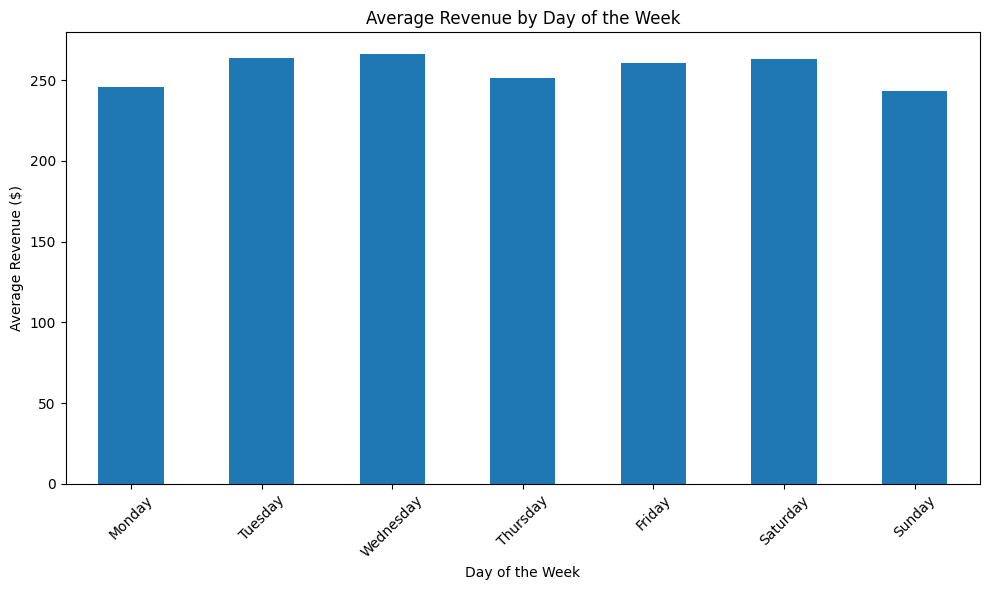

In [ ]:
# Your code here
days = data.groupby("day_of_week")["revenue"].mean()
print(days)
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days = days.reindex(ordered_days)


days.plot(kind ="bar", figsize=(10,6), title="Average Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [16]:
# Your code here
data["profit"] = data["revenue"] * 0.2

profitable_regions = data.groupby("region")["profit"].sum().sort_values(ascending=False)
print(profitable_regions)
print(profitable_regions.idxmax())

region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64
South


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          500 non-null    int64         
 1   customer_id       500 non-null    int64         
 2   customer_segment  500 non-null    object        
 3   region            500 non-null    object        
 4   order_date        500 non-null    datetime64[ns]
 5   product_category  500 non-null    object        
 6   quantity          500 non-null    int64         
 7   unit_price        500 non-null    float64       
 8   revenue           500 non-null    float64       
 9   discount_applied  500 non-null    int64         
 10  payment_method    500 non-null    object        
 11  month             500 non-null    period[M]     
 12  day_of_week       500 non-null    object        
 13  quarter           500 non-null    period[Q-DEC] 
 14  profit            500 non-

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

In [ ]:

#Analysis Summary
# Most profitable region is South.
# Credit card is the most used payment method.
# Most revenue is generated in Wesnsday.
# Discount applied on product is more

#Recommendation
# Focus marketing efforts on the South region to maximize profits.
# Promote credit card payment options to enhance customer convenience and potentially increase sales.
# Consider special promotions or discounts on Wednesdays to capitalize on higher average revenue.


---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.